In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
data = '/home/joe/data/covid19/summary'
#data = '/run/user/1000/gvfs/smb-share:server=majesty.local,share=filesjoe/data/summary'
df = pd.read_csv(data)

df = df.astype({'country':'string','cases':'int32', 'deaths':'int32'})
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.sort_values(by=['date'])
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [26]:
df.head()

,date,country,cases,deaths,mortality,new cases,new deaths
0,2020-01-27,china,2741,80,0.029186,NaN,NaN
1,2020-01-28,china,4537,106,0.023363,1796.0,26.0
2,2020-01-29,china,5997,132,0.022011,1460.0,26.0
3,2020-01-30,china,7736,170,0.021975,1739.0,38.0
4,2020-01-31,china,9720,213,0.021914,1984.0,43.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        49 non-null     datetime64[ns]
 1   country     49 non-null     string        
 2   cases       49 non-null     int32         
 3   deaths      49 non-null     int32         
 4   mortality   49 non-null     float64       
 5   new cases   48 non-null     float64       
 6   new deaths  48 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int32(2), string(1)
memory usage: 2.4 KB


Text(0, 0.5, 'cumulative deaths')

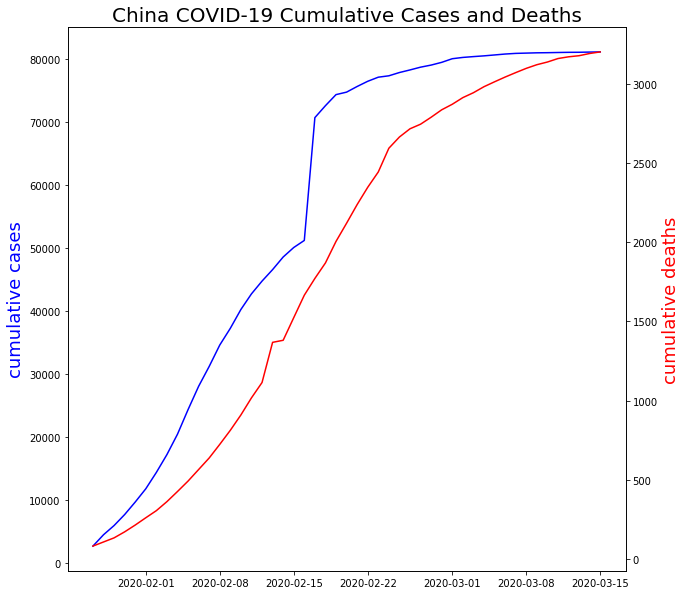

In [30]:
fig = plt.figure()
fig.set_size_inches(10,10)

ax1 = fig.add_subplot(111)
ax1.plot(df['date'],df['cases'], color='b')
ax1.set_ylabel('cumulative cases', color='b',fontsize=18)
ax1.set_title("China COVID-19 Cumulative Cases and Deaths", fontsize=20)

ax2 = ax1.twinx()
ax2.plot(df['date'],df['deaths'],'r')
ax2.set_ylabel('cumulative deaths', color='r',fontsize=18)

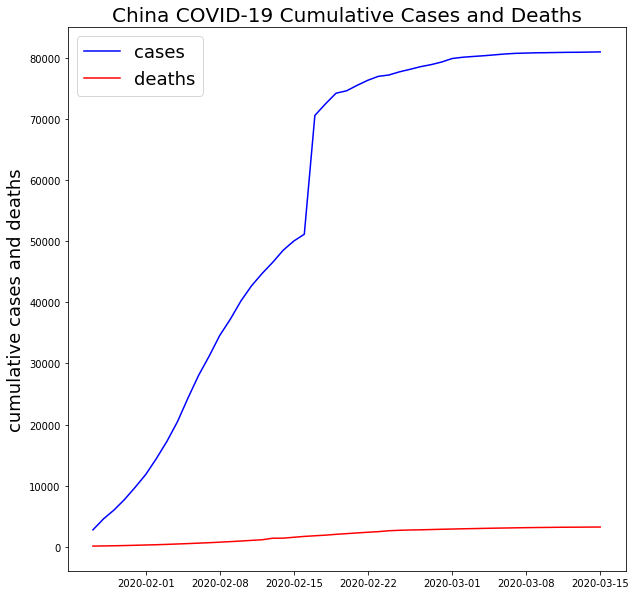

In [66]:
figA = plt.figure(figsize=(10,10))
ax1 = figA.add_subplot(111)
ax1.set_title("China COVID-19 Cumulative Cases and Deaths", fontsize=20)
ax1.set_ylabel('cumulative cases and deaths', color='black',fontsize=18)
plt.plot(df['date'],df['cases'],color='blue')
plt.plot(df['date'],df['deaths'],color='red')
plt.legend(['cases','deaths'], fontsize=18)


Text(0.5, 1.0, 'China COVID-19 Rate of Mortality')

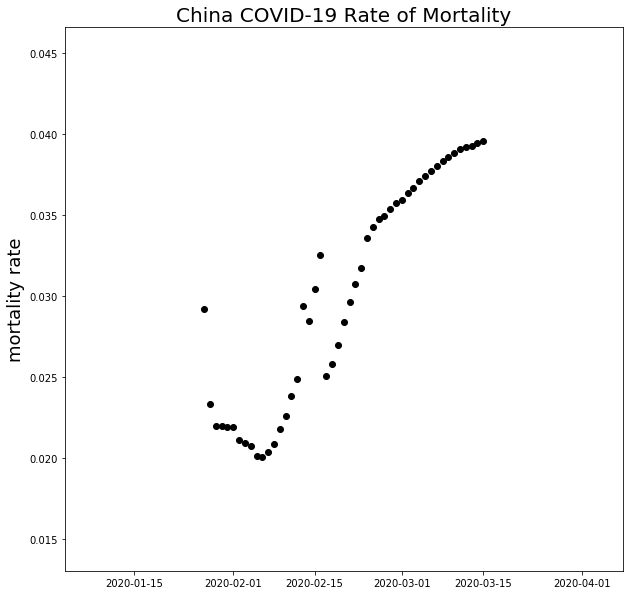

In [45]:
figM = plt.figure()
figM.set_size_inches(10,10)

axM = figM.add_subplot(111)
axM.scatter(df['date'],df['mortality'], color='black')
axM.set_ylabel('mortality rate', color='black',fontsize=18)
axM.set_title("China COVID-19 Rate of Mortality", fontsize=20)

In [23]:
df['new cases'] = df.cases - df.cases.shift(1)
df['new deaths'] = df.deaths - df.deaths.shift(1)
#df = df.fillna(0)
df.corr()

,cases,deaths,mortality,new cases,new deaths
cases,1.000000,0.969542,0.843466,-0.268616,-0.094946
deaths,0.969542,1.000000,0.939989,-0.380774,-0.258748
mortality,0.843466,0.939989,1.000000,-0.477156,-0.336352
new cases,-0.268616,-0.380774,-0.477156,1.000000,0.241937
new deaths,-0.094946,-0.258748,-0.336352,0.241937,1.000000


Text(0, 0.5, 'new deaths')

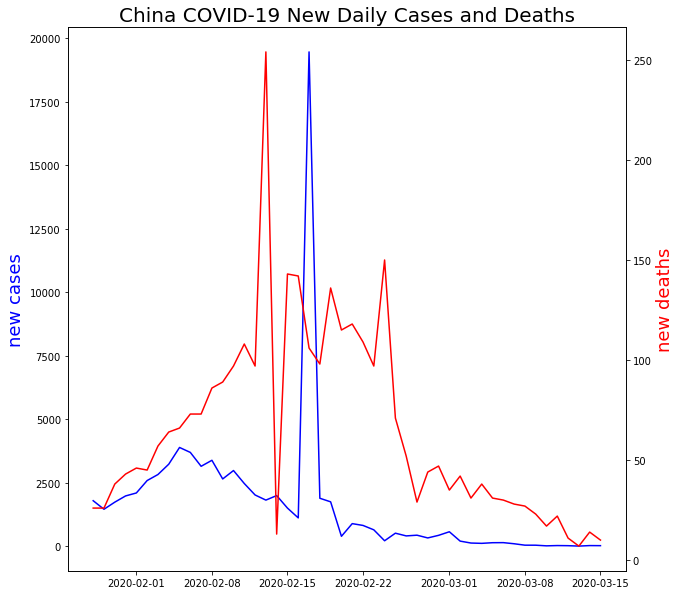

In [34]:
figB = plt.figure()
figB.set_size_inches(10,10)

axB1 = figB.add_subplot(111)
axB1.plot(df['date'],df['new cases'], color='b')
axB1.set_ylabel('new cases', color='b', fontsize=18)
axB1.set_title("China COVID-19 New Daily Cases and Deaths", fontsize=20)

axB2 = axB1.twinx()
axB2.plot(df['date'],df['new deaths'], color='r')
axB2.set_ylabel('new deaths', color='r', fontsize=18)